In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [2]:
df = pd.read_csv('tweet_data.csv')

In [3]:
df.head()

,tweetID,crDate,edInput,editor,engages,isApproved,isEdNeed,isRT,likes,photoUrl,retweets,rtUsID,text,topicName,usFlwrs,usID,usName,videoUrl
0,1070867471245164544,2018-12-07 02:27:55,-1,-1,98,False,True,False,64,https://pbs.twimg.com/media/Dtx8SiIWkAImVsb.jpg,34,-1,The immediate impulse for an alliance of the E...,Business,23464532,5988062,The Economist,NaN
1,1070868017888837633,2018-12-07 02:30:05,-1,-1,13,False,True,False,10,https://pbs.twimg.com/media/Dtx8yTyW4AEciqP.jpg,3,-1,America's economy is flashing some warning sig...,Business,1732809,16184358,CNN Business,NaN
2,1070868012864028673,2018-12-07 02:30:04,-1,-1,12,False,True,False,8,NaN,4,-1,Lyft files for what is expected to be one of t...,Business,2253989,25053299,FORTUNE,NaN
3,1070867995239555075,2018-12-07 02:30:00,-1,-1,5,False,True,False,4,NaN,1,-1,"Exporters still waiting to get Rs 6,000 crore ...",Business,1704056,43855487,Business Standard,NaN
4,1070867995205885952,2018-12-07 02:30:00,-1,-1,5,False,True,False,2,NaN,3,-1,Ride-hailing firm Lyft races to leave Uber beh...,Business,1997662,15110357,Reuters Business,https://video.twimg.com/amplify_video/10708116...


In [4]:
# how many tweets have been reviewed by an editor/how big is my labelled dataset size?
df['edInput'].value_counts()

edInput
-1    422665
 1    215577
 2    106741
 4     32733
 3      8200
Name: count, dtype: int64

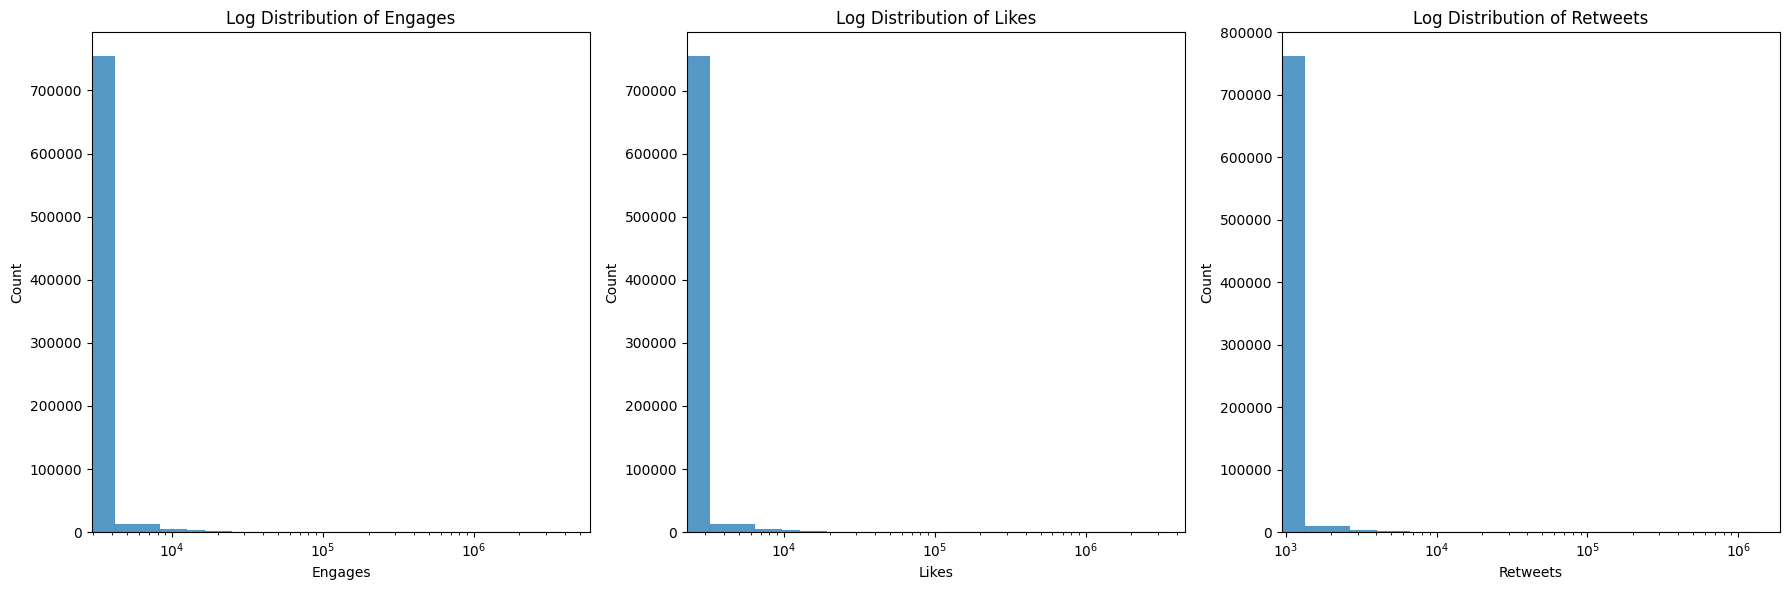

In [44]:
# Distributions of tweet engagement metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  

sns.histplot(x='engages', data=df, ax=axes[0], bins=1000)
axes[0].set_xscale('log')
axes[0].set_title('Log Distribution of Engages')
axes[0].set_xlabel('Engages')

sns.histplot(x='likes', data=df, ax=axes[1], bins=1000)
axes[1].set_xscale('log')
axes[1].set_title('Log Distribution of Likes')
axes[1].set_xlabel('Likes')

sns.histplot(x='retweets', data=df, ax=axes[2], bins=1000)
axes[2].set_xscale('log')
axes[2].set_title('Log Distribution of Retweets')
axes[2].set_xlabel('Retweets')

plt.tight_layout()
plt.show()

Distribution shows very strong right (positive skew), may be worth using log transformed values in modelling

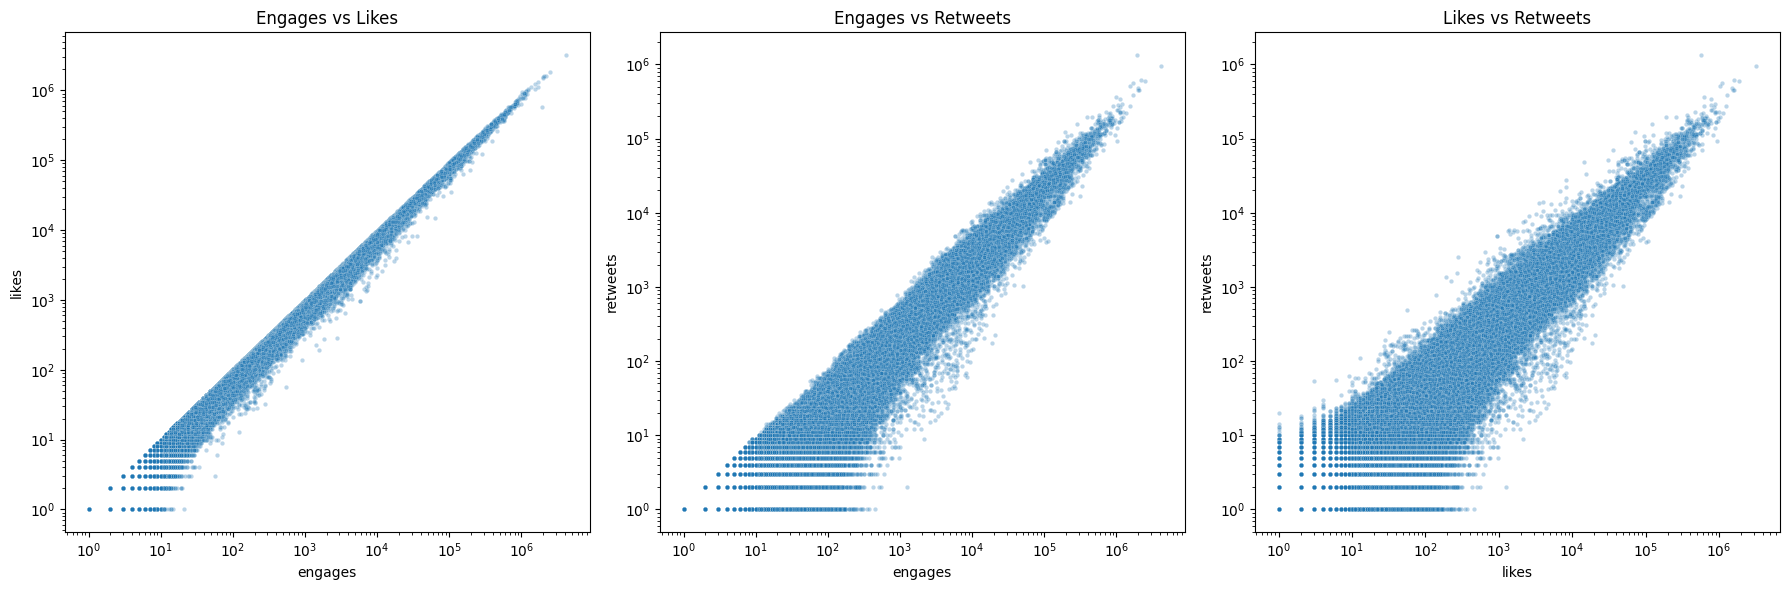

In [ ]:
#Look at correlations across tweet engagement metrics
fig, axes = plt.subplots(1, 3, figsize = (18,6))
sns.scatterplot(x = 'engages', y = 'likes', data = df, ax=axes[0],alpha = 0.3, s = 10)
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_title('Engages vs Likes')

sns.scatterplot(x='engages', y = 'retweets', data = df, ax = axes[1],alpha = 0.3, s = 10)
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_title('Engages vs Retweets')

sns.scatterplot(x= 'likes', y = 'retweets', data = df, ax = axes[2], alpha = 0.3, s = 10)
axes[2].set_xscale('log')
axes[2].set_yscale('log')
axes[2].set_title('Likes vs Retweets')

plt.tight_layout()
plt.show()



In [ ]:
def log_corr_stats(x, y, df):
    # Filter to positive values to avoid log(0) or negatives
    mask = (df[x] > 0) & (df[y] > 0)
    log_x = np.log10(df.loc[mask, x])
    log_y = np.log10(df.loc[mask, y])
    
    slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)
    r_squared = r_value ** 2
    return r_squared, p_value

# calculate stats for each pair
r2_1, pval_1 = log_corr_stats('engages', 'likes', df)
r2_2, pval_2 = log_corr_stats('engages', 'retweets', df)
r2_3, pval_3 = log_corr_stats('likes', 'retweets', df)

print(f"Engages vs Likes: R² = {r2_1:.3f}, p = {pval_1:.10e}")
print(f"Engages vs Retweets: R² = {r2_2:.3f}, p = {pval_2:.10e}")
print(f"Likes vs Retweets: R² = {r2_3:.3f}, p = {pval_3:.10e}")

Engages vs Likes: R² = 0.990, p = 0.0000000000e+00
Engages vs Retweets: R² = 0.930, p = 0.0000000000e+00
Likes vs Retweets: R² = 0.880, p = 0.0000000000e+00


Engagement metrics are strongly correlated with one another (as expected). May need to handle this redundacny in modelling

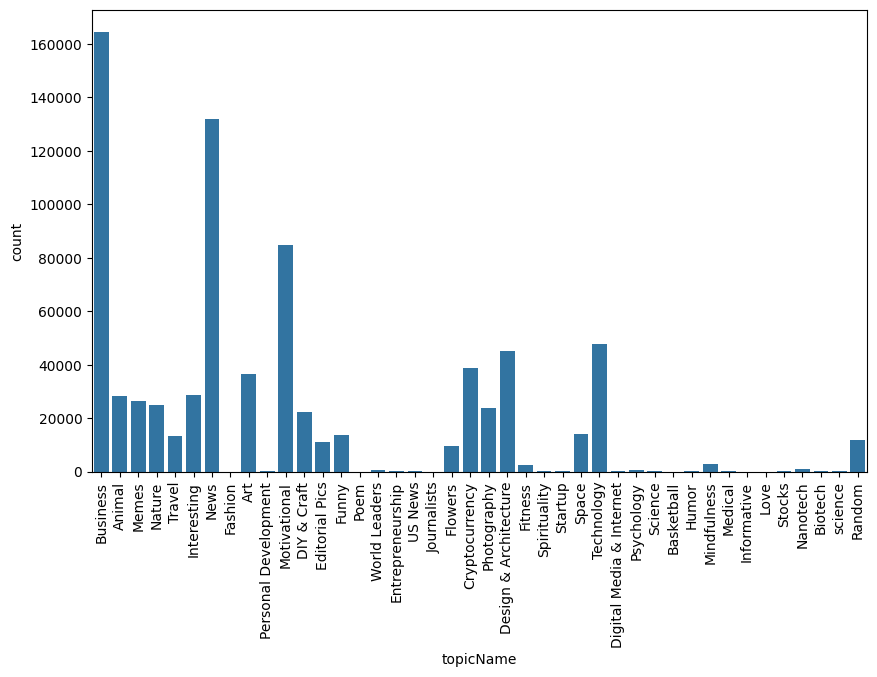

In [30]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'topicName', data = df)
#plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()